<a href="https://colab.research.google.com/github/Adejoju23/Adejoju23/blob/main/MARKET__BASKET__ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the dataset

df = pd.read_csv('/content/drive/MyDrive/Market Basket Analysis - Groceries_dataset (1).csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [ ]:
df.head

<bound method NDFrame.head of        Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]>

In [ ]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [ ]:
#checking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
# Convert 'Member_number' to string and 'Date' to datetime
df['Member_number'] = df['Member_number'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])


<ipython-input-13-0f87f266f48c>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df['date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


<ipython-input-10-c8a148b5b93e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date']= pd.to_datetime(df['Date'])


In [ ]:
df.shape

(38765, 4)

In [ ]:
#checking for the missing values

df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
date               0
dtype: int64

In [ ]:
# Create a 'uniqueTransaction' column
df['uniqueTransaction'] = df['Member_number']+ '_' + df['Date'].astype(str)
df.head()

,Member_number,Date,itemDescription,date,uniqueTransaction
0,1808,2015-07-21,tropical fruit,2015-07-21,1808_2015-07-21
1,2552,2015-05-01,whole milk,2015-05-01,2552_2015-05-01
2,2300,2015-09-19,pip fruit,2015-09-19,2300_2015-09-19
3,1187,2015-12-12,other vegetables,2015-12-12,1187_2015-12-12
4,3037,2015-01-02,whole milk,2015-01-02,3037_2015-01-02


In [ ]:
# Checking a particular customer (1708)'s purchases.

ACustomerCheck = df[df['Member_number'] == '1708'].sort_values('Date')
ACustomerCheck.head(20)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,date,uniqueTransaction
11150,1708,2014-09-07,other vegetables,2014-09-07,1708_2014-09-07
27299,1708,2014-09-07,whole milk,2014-09-07,1708_2014-09-07
1314,1708,2015-02-04,oil,2015-02-04,1708_2015-02-04
17463,1708,2015-02-04,onions,2015-02-04,1708_2015-02-04
2071,1708,2015-09-18,cat food,2015-09-18,1708_2015-09-18
7448,1708,2015-09-18,whole milk,2015-09-18,1708_2015-09-18
7802,1708,2015-09-18,turkey,2015-09-18,1708_2015-09-18
18220,1708,2015-09-18,spread cheese,2015-09-18,1708_2015-09-18
23597,1708,2015-09-18,canned beer,2015-09-18,1708_2015-09-18
23951,1708,2015-09-18,berries,2015-09-18,1708_2015-09-18


In [ ]:
# Create a cross-tabulation ('basket')
basket = pd.crosstab(df['uniqueTransaction'], df['itemDescription'])
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_2015-05-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4999_2015-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_2014-09-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create a binary-encoded DataFrame ('apriori_df')
apriori_df = basket.applymap(lambda x: 1 if x > 0 else 0)
apriori_df

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_2015-05-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4999_2015-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_2014-09-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Apply Apriori algorithm to generate frequent itemsets
frequent_itemsets = apriori(apriori_df, min_support=0.02, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.045312,(bottled beer)
4,0.060683,(bottled water)
5,0.037626,(brown bread)
6,0.035220,(butter)
7,0.046916,(canned beer)
8,0.027869,(chicken)
9,0.023592,(chocolate)


In [ ]:
frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.045312,(bottled beer)
4,0.060683,(bottled water)


In [ ]:
# Generate association rules

# Applying the Apriori algorithm to generate frequent itemsets from the binary-encoded DataFrame 'apriori_df'
frequent_itemsets = apriori(apriori_df, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values(by='zhangs_metric', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
9,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
34,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
35,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
31,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
30,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
1,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
0,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
32,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
33,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


<Figure size 2000x2000 with 0 Axes>

<Axes: xlabel='consequents', ylabel='antecedents'>

Text(0.5, 1.0, 'Frequently Bought Together - Association Rules Heatmap')

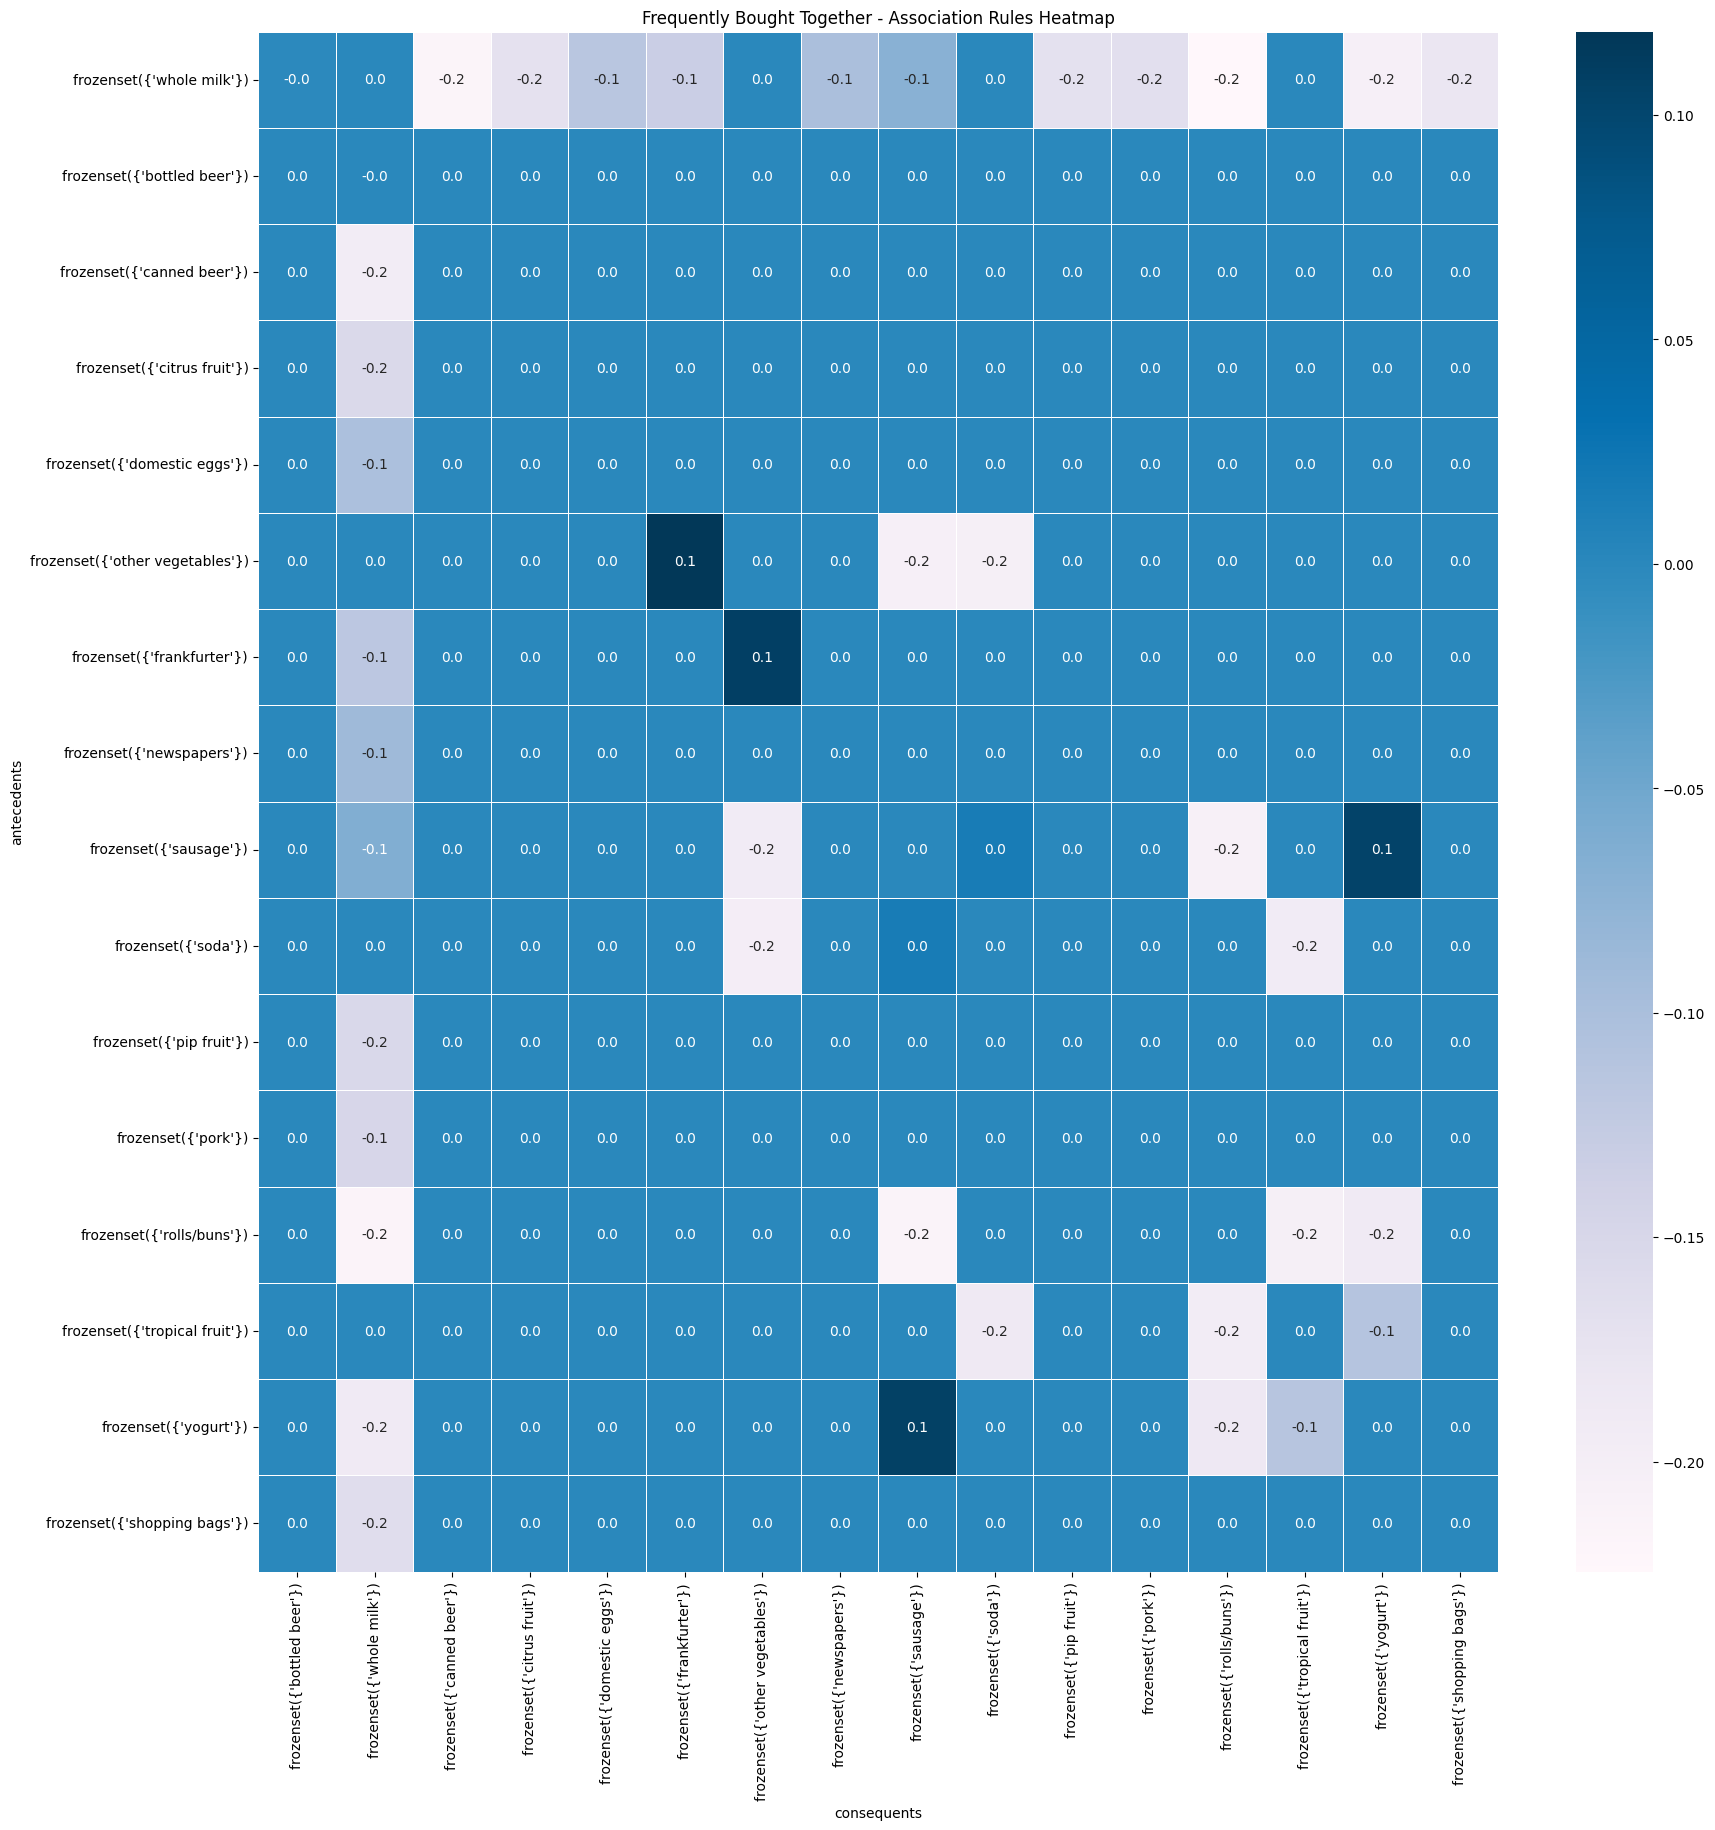

In [ ]:
# Creating a matrix of product associations
product_associations = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(product_associations, annot=True, cmap="PuBu", fmt=".1f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap")
plt.show()

In [ ]:
# Pairing positive Zhang's metric in a separate dataframe

pos_pair = rules[rules['zhangs_metric'] > 0]

pos_pair.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
9,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
30,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
31,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
34,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508


<Figure size 1000x700 with 0 Axes>

<Axes: xlabel='consequents', ylabel='antecedents'>

Text(0.5, 1.0, 'Frequently Bought Together - Association Rules Heatmap')

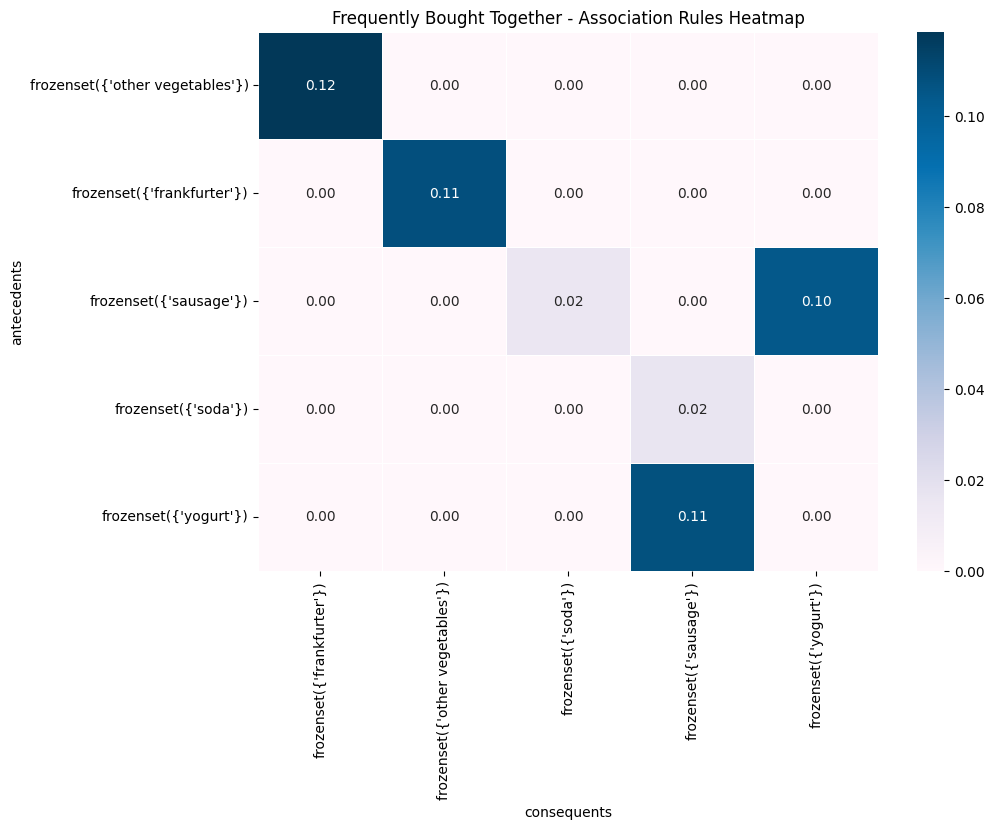

In [ ]:
# Creating a matrix of product associations
pos_association = pos_pair.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(pos_association, annot=True, cmap="PuBu", fmt=".2f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap")
plt.show()



<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='lift', ylabel='consequents'>

Text(0.5, 1.0, 'Positive Associations - Lift')

Text(0.5, 0, 'Lift')

Text(0, 0.5, 'Consequents')

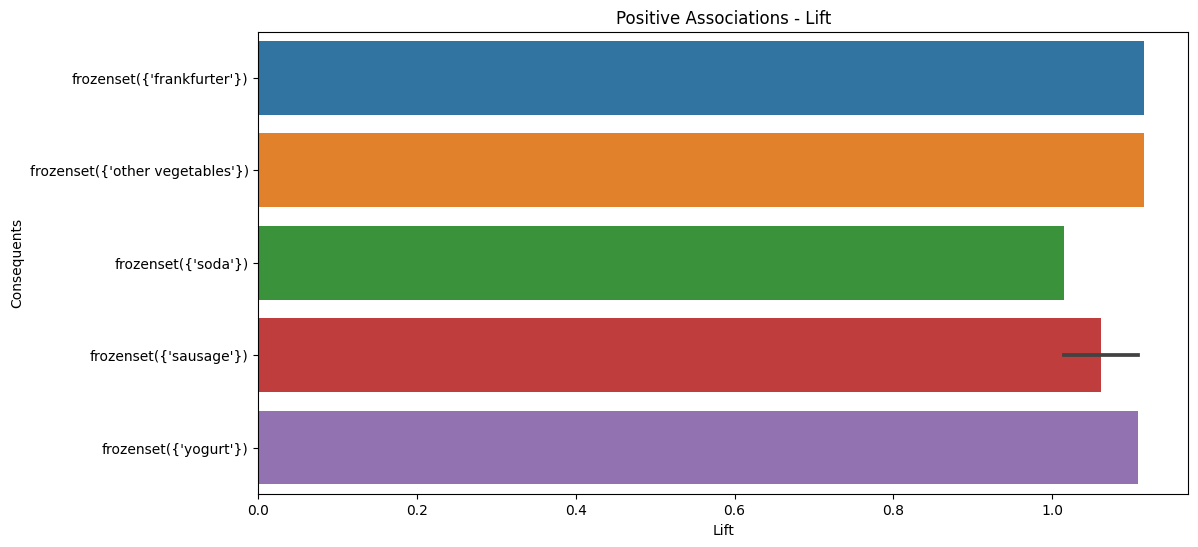

In [ ]:
# Bar plot for lift of positive associations
plt.figure(figsize=(12, 6))
sns.barplot(x='lift', y='consequents', data=positive_associations)
plt.title('Positive Associations - Lift')
plt.xlabel('Lift')
plt.ylabel('Consequents')
plt.show()


<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Positive Associations - Network Graph')

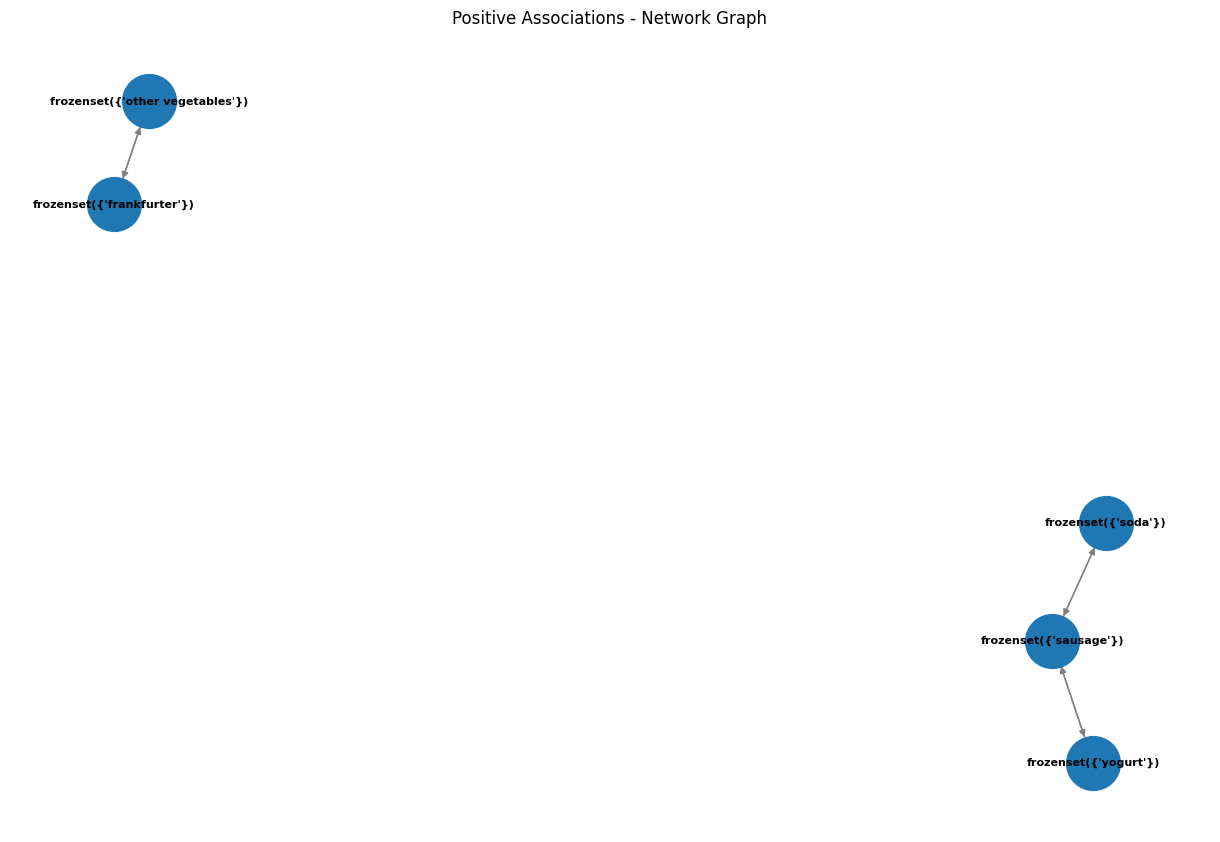

In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges and nodes based on positive associations
for index, row in positive_associations.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

# Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1500, font_color='black', font_weight='bold', edge_color='gray')
plt.title('Positive Associations - Network Graph')
plt.show()


<Figure size 1600x900 with 0 Axes>

<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x7c9a9b7e1210>,
 [Text(0, 0, 'whole milk'),
  Text(1, 0, 'other vegetables'),
  Text(2, 0, 'rolls/buns'),
  Text(3, 0, 'soda'),
  Text(4, 0, 'yogurt'),
  Text(5, 0, 'root vegetables'),
  Text(6, 0, 'tropical fruit'),
  Text(7, 0, 'bottled water'),
  Text(8, 0, 'sausage'),
  Text(9, 0, 'citrus fruit')])

Text(0.5, 0, 'Item Names')

Text(0, 0.5, 'Number of Quantity Sold')

Text(0.5, 1.0, 'Top 10 Sold Items')

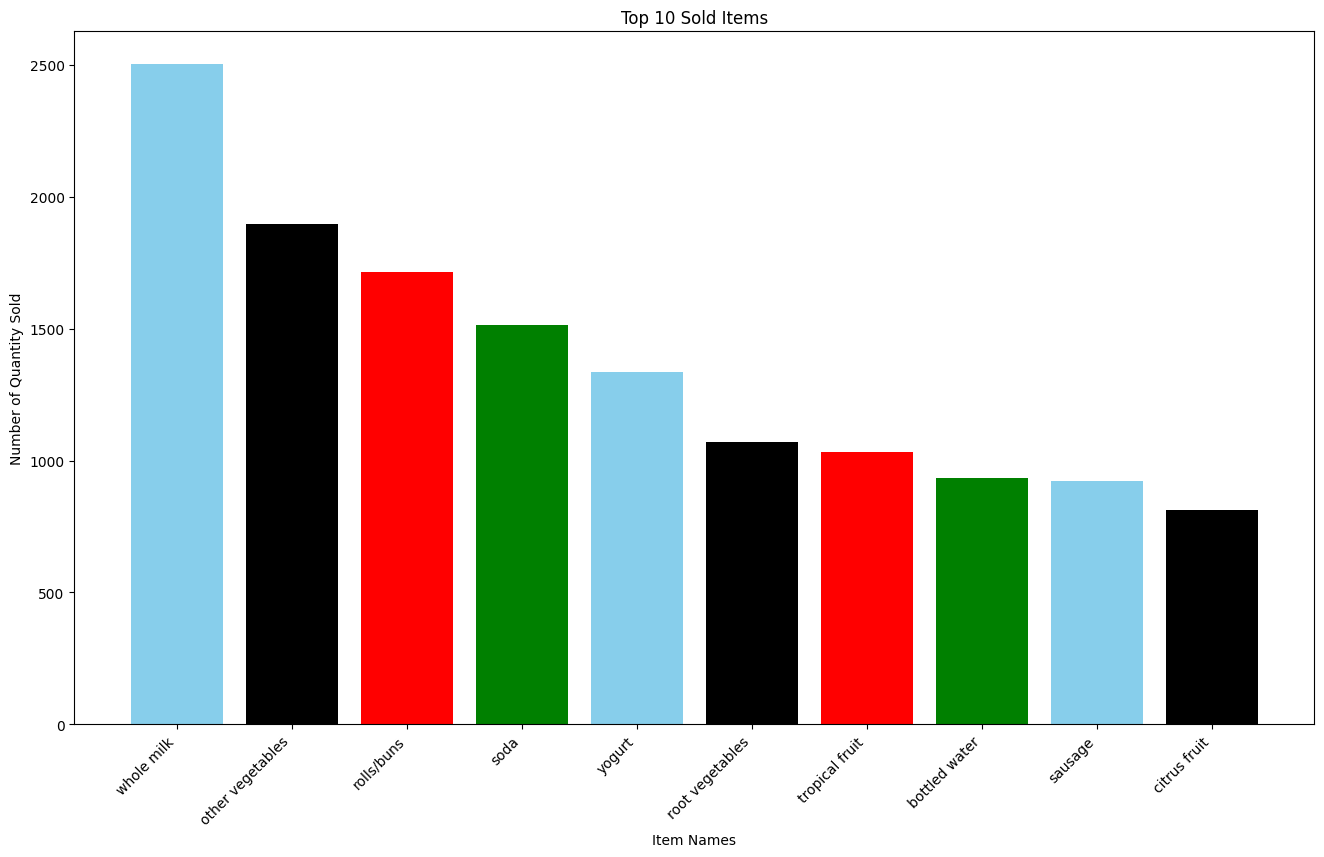

164          whole milk
102    other vegetables
122          rolls/buns
138                soda
165              yogurt
123     root vegetables
156      tropical fruit
12        bottled water
130             sausage
30         citrus fruit
Name: itemDescription, dtype: object


In [ ]:
Item_distr = df.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency', ascending=False).head(10)

# Extracting values from DataFrame columns
bars = Item_distr['itemDescription']
Height = Item_distr['Frequency']
Item_names = df['itemDescription'].unique().tolist()

# Define x_pos based on the length of 'bars'
x_pos = np.arange(len(bars))

# Plotting
plt.figure(figsize=(16, 9))
plt.bar(x_pos, Height, color=['skyblue', 'black', 'red', 'green'])
plt.xticks(x_pos, bars, rotation=45, ha='right')  # Use 'bars' for x-axis labels
plt.xlabel('Item Names')
plt.ylabel('Number of Quantity Sold')
plt.title('Top 10 Sold Items')
plt.show()
print(bars)





**SUMMARY**

This Market Basket Analysis project is aimed to uncover associations between products in a grocery sales dataset using the Apriori algorithm. The key steps included data loading, cleaning, creating a cross-tabulation (basket), applying the Apriori algorithm, and visualizing the associations through heatmaps. Association rules, particularly those with positive relationships, were explored and visualized to provide actionable insights for business decisions.

**Relevance:**

1. Understanding Customer Behavior:

Market Basket Analysis is crucial for understanding customer purchasing behavior by identifying products frequently bought together. This knowledge enables businesses to optimize product placements, enhance cross-selling strategies, and improve the overall customer experience.
2. Targeted Marketing and Promotions:

Positive associations highlight complementary products, offering opportunities for targeted marketing and promotions. By strategically bundling or promoting related items, businesses can increase sales and customer satisfaction.
3. Inventory Management:

Insights from the analysis can aid in inventory management. Knowing which products are frequently purchased together helps businesses optimize stock levels, reduce wastage, and streamline supply chain operations.
4. Strategic Product Placement:

Businesses can strategically place related products in proximity to boost sales. For example, placing bread and butter together can leverage the positive association between these items.

**Interpretations:**

1. Positive Associations:

Positive associations signify products that have a strong tendency to be purchased together. This could represent natural pairings or items that complement each other. For instance, the positive association between coffee and sugar suggests that customers often buy these items together.
2. Confidence and Lift:

Confidence and lift metrics help quantify the strength and significance of associations. Higher confidence indicates a stronger likelihood of one product being purchased when the other is bought. Lift above 1 signifies a positive association, while lift close to or below 1 suggests weaker associations.


**Recommendations:**

1. Promotional Bundles:

Implement promotional bundles or discounts for products with high positive associations to encourage customers to purchase them together.
2. Visual Merchandising:

Optimize product placements based on positive associations to enhance visual merchandising. Placing related items in close proximity can stimulate additional purchases.
3. Customer Engagement:

Leverage insights for targeted marketing campaigns. Engage customers with personalized recommendations based on their purchasing patterns.
4. Dynamic Pricing Strategies:

Consider dynamic pricing strategies for items with strong positive associations. Offering discounts on complementary products can stimulate sales.

**Implementation:**

1. Integration with POS Systems:

Implement the analysis findings into Point of Sale (POS) systems for real-time recommendations during customer transactions.
2. Regular Analysis Updates:

Periodically update the analysis to adapt to changing customer preferences and market trends.
3. Employee Training:

Train sales and marketing teams to interpret and use the results effectively for strategic decision-making.
4. Feedback Mechanism:

Establish a feedback mechanism to continually refine and improve the association analysis based on business outcomes.




In conclusion, Market Basket Analysis offers valuable insights for businesses to enhance customer satisfaction, boost sales, and optimize operations. By strategically implementing the recommendations derived from this analysis, businesses can stay competitive and agile in responding to evolving consumer behaviors.